# Bevezetés az adattudományba 1.

## 4. notebook (lineáris és polinomiális regresszió, gradiens módszer, karakterfelismerés neurális hálóval)

### Lineáris regresszió

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

A Boston Housing Data Set elnevezésű boston környéki települések ingatlanárait tartalmazó adatokkal fogunk dolgozni

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Nézzük magát az adatot!

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Oszlopnevek hozzáadása

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Tekintsük a célváltozót!

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Egy kevés leíró statisztika - felderítő elemzés

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Pontfelhők

Text(0.5, 1.0, 'Relationship between CRIM and Price')

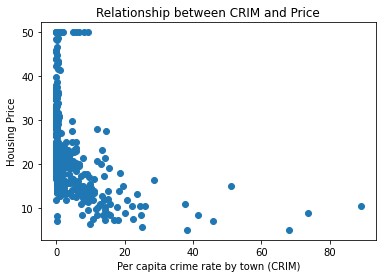

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

Text(0.5, 1.0, 'Relationship between RM and Price')

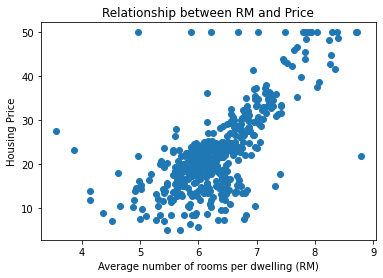

In [13]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

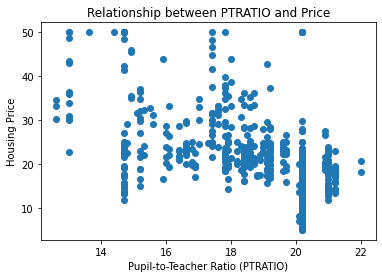

In [14]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

##### Hisztogramok

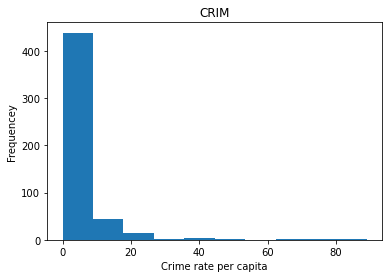

In [15]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

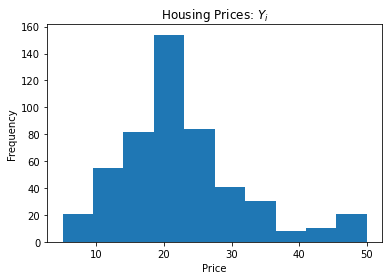

In [16]:
plt.hist(bos.PRICE)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Lineáris regresszió illesztése

In [17]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

###### Milyen lehetőségeink vannak egy lienáris regressziós objetummal? 

In [18]:
# Look inside linear regression object
# LinearRegression.<tab>

In [19]:
# Look inside lm object
# lm.<tab>

In [20]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

In [21]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.45948838509015


In [22]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [23]:
# The coefficients
pd.DataFrame({'featues':X.columns, 'estimatedCoefficients':lm.coef_})

,featues,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [24]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

Text(0, 0.5, 'Frequency')

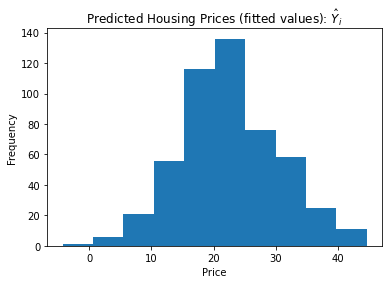

In [25]:
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

##### Jósolt és valódi értékek

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

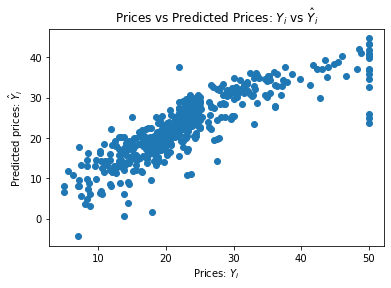

In [26]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

##### RSS, MSE

In [27]:
rss = np.sum((bos.PRICE - lm.predict(X)) ** 2)
rss

11078.784577954977

In [28]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
mseFull

21.89483118172922

#### Egy magyarázó változó használata

In [29]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression()

In [30]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
msePTRATIO

62.65220001376927

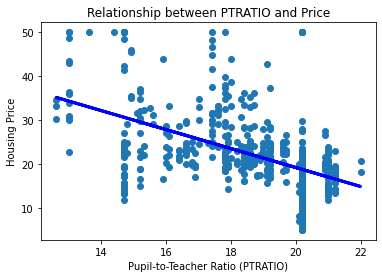

In [31]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

#### Tanító és teszthalmaz

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [33]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

##### Hibaszámítás

In [34]:
print("Fit a model on X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model on X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model on X_train, and calculate MSE with Y_train: 19.546758473534663
Fit a model on X_train, and calculate MSE with X_test, Y_test: 28.530458765974604


##### Reziduálisok ábrája

Text(0, 0.5, 'Residuals')

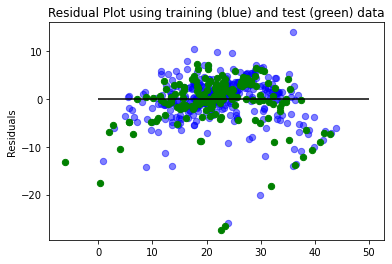

In [35]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

### Gradiens módszer kis példán

#### Adat

Néhány lakás mérete ($m^2$) és ára (millió Ft):

In [36]:
size = [26, 33, 49, 53, 120, 150]
price = [9.8, 7.3, 14, 15, 45, 40]

<module 'matplotlib.pyplot' from 'C:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

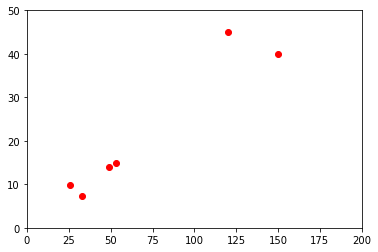

In [37]:
plt.plot(size, price, 'ro')
plt.axis( [0, 200, 0, 50] )
plt

#### Lineáris modell illesztése

Először írunk egy függvényt, ami kiszámítja a négyzetes eltérések összegét egy adott $ y = w^T x$ modell esetén. Feltessszük, hogy az adat adott, így a hiba csak $w$-től függ

In [38]:
def err(w):
    return np.sum(np.power(np.add(np.multiply(w,size), np.multiply(-1, price)),2))

Tekintsünk néhány egyszerű lineáris modellt, és számoljuk ki a hibájukat:

* Modell 1 (kék): price = 0.3 * size
* Modell 2 (zöld): price = 0.4 * size
* Modell 3 (piros): price = 0.5 * size

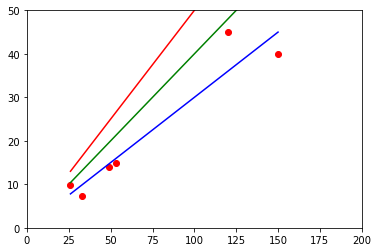

In [39]:
plt.plot(size, price, 'ro')
plt.plot(size, np.multiply(0.3,size), 'b-')
plt.plot(size, np.multiply(0.4,size), 'g-')
plt.plot(size, np.multiply(0.5,size), 'r-')
plt.axis( [0, 200, 0, 50] )
plt.show()

In [40]:
err(0.3)

118.06

In [41]:
err(0.4)

513.97

In [42]:
err(0.5)

1787.38

Ábrázoljuk a négyzetes hibák összegét $w$ függvényében!

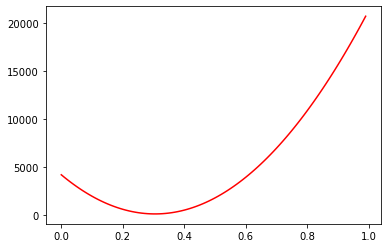

In [43]:
weights = np.multiply( range(100), 0.01)
errors  = []
for w in weights:
    errors = errors + [err(w)]
plt.plot(weights, errors, 'r-')
plt.show()

Keressük a minimális hibájú modellt:

In [44]:
eps = 1e-8     # learning rate
w   = 0.9      # an initial setting of the model's parameter
e   = []       # the error after each iteration (we only use it to visualize convergence)
for iteration in range(10000):
    w = w - eps * ( 2*np.sum( np.multiply(np.multiply(size,size),w)) - 2*np.sum(np.multiply(size,price)) )
    e = e + [err(w)]

In [45]:
w

0.30497367247536933

A hiba az iterációk függvényében

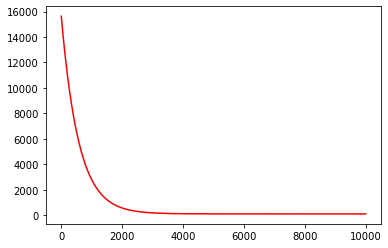

In [46]:
plt.plot(range(10000), e, 'r-')

#### Többváltozós (most polinomiális) regressziós

Normalizáljuk az adatot, és készítsünk egy adattáblát, ami a polinomiális attribútumokat tartalmazza
Példaként most hatodrendű polinomot fogunk illeszteni, azaz a következő modellt tanítjuk: $y = w_0 + w_1 \cdot x + w_2 \cdot x^2 + \dots + w_6 \cdot x^6$

In [47]:
import math
size1 = np.multiply(np.add(size,-np.mean(size)), 1/math.sqrt(np.var(size)) )

size2 = np.multiply(size1,size1)
size3 = np.multiply(size2,size1)
size4 = np.multiply(size3,size1)
size5 = np.multiply(size4,size1)
size6 = np.multiply(size5,size1)

data = np.column_stack( (np.ones(6), size1, size2, size3, size4, size5, size6) )

In [48]:
def err(w):
    e0 = np.dot(data,w)-price
    return sum(np.multiply(e0, e0))

In [49]:
eps = 1e-5
w = [0,0,0,0,0,0,0]
e = []

for iteration in range(100000):
    for k in range(len(w)):
        grad = 2*np.sum(np.multiply((np.dot(data,w)-price),data[:,k]))
        w[k] = w[k] - eps * grad
        
    if iteration % 1000 == 0:  #Just to see what happens and to be able to plot the SSE as function of the iterations
        e0 = err(w)
        e = e + [e0]
        print(str(e0))

4133.388037018066
1870.9117051576468
1551.5684901185573
1298.034171659743
1093.7786711758706
927.1161950750525
789.6530973033013
675.254783011296
579.3548256374715
498.4901795403767
429.98617087378625
371.7410513317352
322.07702542498106
279.63590551072923
243.3049362551539
212.16318908272336
185.4421272577096
162.49605354743093
142.7795485466588
125.82993366083548
111.25340912660731
98.71392973364624
87.92415834382686
78.63802539239502
70.64455124640881
63.76267732210726
57.83691425408982
52.73365978921765
48.33807117336688
44.55140042778618
41.28871863263496
38.47696887465861
36.05329804773145
33.96362602546715
32.16141741437402
30.606626538827584
29.264790787695272
28.10625117231746
27.105482058944098
26.240514660668314
25.49244109276709
24.844987680413773
24.28414781398548
23.797866019103775
23.375766082422835
23.00891707999643
22.689632017799497
22.411294534598664
22.168209753553555
21.955475915660763
21.768873898190062
21.604772125458645
21.46004472695816
21.332001096929766
21.21

##### Modell ábrázolása

In [50]:
sizes = np.add(np.multiply(range(400),0.01),-2)

In [51]:
def predict(size):
    return np.dot(w, (1,size,size**2,size**3,size**4,size**5,size**6))

In [52]:
predictions = []
for i in sizes:
    predictions = predictions + [predict(i)]

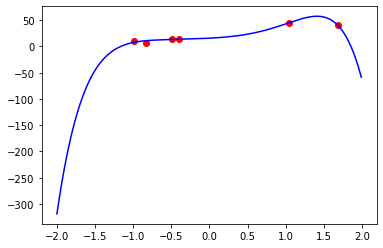

In [53]:
plt.plot(size1,price,'ro')
plt.plot(sizes,predictions,'b-')
plt.show()

Iterációként a hiba (egy egység az x tengelyen 1000 iterációnal felel meg)

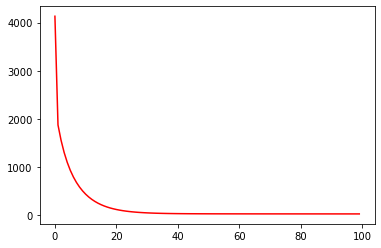

In [54]:
plt.plot(range(100), e, 'r-')
plt.show()

### Ensemble módszerek a banki adatokon

Megismételjük a Notebook02-ben (ill. HF2-ben) elvégzett beolvasási és adatátalakítási lépéseket

In [55]:
import pandas as pd
bank_data = pd.read_csv("../Adatok/bank.csv", delimiter = " ",
                        names = ['age', 'sex', 'region', 'income', 'married', 'children',
                                 'car','save_acct', 'current_acct', 'mortgage', 'pep'])

In [56]:
numeric_data = bank_data.replace(['NO', 'YES', 'MALE', 'FEMALE'],[0,1,0,1])

In [57]:
import numpy as np
numeric_data = numeric_data.values

In [58]:
features = np.zeros((len(numeric_data),4))
numeric_data = np.append(numeric_data,features,1)
j = 2
for i in range(len(numeric_data)):
    if numeric_data[i][j] == 'INNER_CITY':
        numeric_data[i][11:15] = [1,0,0,0]
    if numeric_data[i][j] == 'TOWN':
         numeric_data[i][11:15] = [0,1,0,0]
    if numeric_data[i][j] == 'RURAL':
         numeric_data[i][11:15] = [0,0,1,0]
    if numeric_data[i][j] == 'SUBURBAN':
         numeric_data[i][11:15] = [0,0,0,1]        
#remove redundant column
numeric_data = np.delete(numeric_data, 2, 1)

In [59]:
bank_labels = numeric_data[:, 9].astype(int)

In [60]:
bank_attrs  = np.delete(numeric_data, 9, 1)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [62]:
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_attrs, bank_labels, test_size=0.33, random_state=100)

##### kNN

In [63]:
neigh = KNeighborsClassifier(n_neighbors=11,metric="euclidean")
neigh.fit(bank_features_train,bank_labels_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [64]:
predictions_test = neigh.predict(bank_features_test)

In [65]:
knn_prob = neigh.predict_proba(bank_features_test)

In [66]:
metrics.roc_auc_score(bank_labels_test,knn_prob[:,1])

0.5688827614379084

Láttuk, nem túl erős, ennek tisztáztuk az okait is, háziban kipróbáltátok a döntési fát is.

##### Döntési fa

In [67]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier( max_depth = 2 )
dectree = dectree.fit(bank_features_train,bank_labels_train)
predictions = dectree.predict(bank_features_test)
dectree_prob = dectree.predict_proba(bank_features_test)

In [68]:
metrics.roc_auc_score(bank_labels_test, dectree_prob[:,1], average='macro', sample_weight=None)

0.7361111111111112

##### Kombináljuk őket!

Van egy rosszul teljesítő legközelebbi szomszéd és egy jól teljesítő döntési fa módszerünk, kombináljuk őket!

In [69]:
metrics.roc_auc_score(bank_labels_test,0.9*dectree_prob[:,1]+0.2*knn_prob[:,1], average='macro', sample_weight=None)

0.7490298202614379

A legegyszerűbb ensemble módszerrel (a kijött pontértékekből új pontértéket kevertünk) is jobb osztályozót kaptunk.

Pontokból döntés

In [70]:
metrics.confusion_matrix(bank_labels_test,0.9*dectree_prob[:,1]+0.2*knn_prob[:,1]>0.45)

array([[51, 51],
       [12, 84]], dtype=int64)

##### Bagging

In [71]:
from sklearn import ensemble
bagging_dt=ensemble.BaggingClassifier (
    base_estimator=DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_leaf=5), 
    n_estimators=10)
bagging_dt.fit(bank_features_train,bank_labels_train)
bagging_dt_prob_test = bagging_dt.predict_proba(bank_features_test)
metrics.roc_auc_score(bank_labels_test,bagging_dt_prob_test[:,1], average='macro', sample_weight=None)

0.8689746732026143

:)

### Karakterfelismerés neurális hálóval - külön függvénykönyvtár használata nélkül

Az adatok az UCI adattárházból vannak

Az adat kézzel írt számjegyeket tartalmaz: 0, 1, 2 ... 9.

"1593 handwritten digits from around 80 persons were scanned, stretched in a rectangular box 16x16 in a gray scale of 256 values.Then each pixel of each image was scaled into a bolean (1/0) value using a fixed threshold."

Bővebb leírás az adatról: https://archive.ics.uci.edu/ml/datasets/Semeion+Handwritten+Digit

Kidolgozás: Buza Krisztián

In [72]:
data = np.loadtxt('../Adatok/semeion.data', delimiter=' ', skiprows = 0)

In [73]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

Az első 256 oszlop a pixelértéknek felel meg (0 vagy 1), a következő 10 érték pedig a karakternek felel meg binárisan.

Vizualizáljuk az adatot!

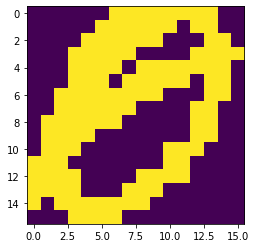

In [74]:
plt.imshow(np.reshape(data[0,0:256],(16,16)))
plt.show()

0-nak tűnik, valóban, az?

In [75]:
data[0,256:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

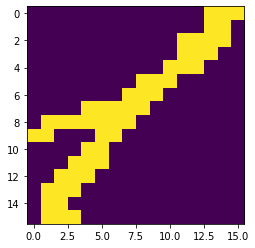

In [76]:
plt.imshow(np.reshape(data[25,0:256],(16,16)))
plt.show()

In [77]:
data[25,256:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

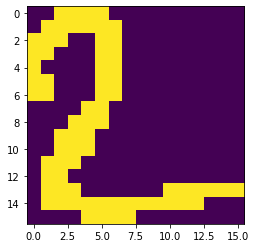

In [78]:
plt.imshow(np.reshape(data[50,0:256],(16,16)))
plt.show()

In [79]:
data[50,256:]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

#### Neurális hálózat tanítása

Először is kell egy szigmoid függvény!

In [80]:
import math

def sigmoid(list):
    list1 = []
    for x in list:
        list1 = list1 + [1/(1+math.exp(-x))]
    return list1

Háromrétegű (egy rejtett rétegű) neurális hálózatot fogunk tanítani. A rejtett rétegben lévő neuronok számát mi állíthatjuk be (a bemeneti és kimeneti rétegekben ezek a probléma által adottak).

Elősözör a forward propagation algoritmust implementáljuk, melynek bemente két mátrix Theta1 és Theta2, illetve egy vektor x.

Theta1 tartalmazza azokat az élsúlyokat, amik a bemenei csúcsokat és a rejtett réteg csúcsait kötik össze.
Theta2 pedig a rejtett réteg csúcsait a kimeneti csúcsokkal összekötő élek súlyait.
Az x vektor pedig az adat egy példánya.
A kimenet pedig az egyes rétegeken az (aktiválás utáni) kimenet.

In [81]:
def forward_prop(Theta1, Theta2, x):
    a1 = np.concatenate([[1],x])
    z2 = np.dot(Theta1,a1)
    a2 = sigmoid(z2)
    a2 = np.concatenate([[1],a2])
    z3 = np.dot(Theta2,a2)
    a3 = sigmoid(z3)
    return (a1, a2,a3)

A következőkben a backpropagation algoritmussal kiszámoljuk a gradienst és minimalizáljuk a célfüggvényt.
Egyszerűség kedvéért az adatok felén tanulunk,  felén tesztelünk.

In [82]:
# Learning rate. It is set to a relatively large value for this example to make sure that it works relatively fast
eps = 0.5

# Regularization parameter
lmd = 0.001

# Number of units in the hidden layer
hidden_layer = 25 

# Random initialization of the weights
np.random.seed(42)
Theta1 = (np.random.random( (hidden_layer,257) ))-0.5
Theta2 = (np.random.random( (10,hidden_layer+1) ))-0.5

# we perform 2000 interation of gradient descent
for iteration in range(2000):
    
    Delta1 = np.zeros( (hidden_layer, 257) )    # 256 weights + 1 bias weight for each hidden node
    Delta2 = np.zeros( (10, hidden_layer+1) )   #  20 weights + 1 bias weight for each output node
    for instance in range(int(len(data)/2)):
        # Forward propagation
        (a1, a2,a3) = forward_prop( Theta1, Theta2, data[instance,0:256] )
        
        
        # We calculate the "errors" of the units using back-propagation 
        
        # The "error" of the output units
        d3 = a3 - data[instance,256:]
        
        # The "error" of the hidden units, note that the "error" of the bias unit does not matter 
        # as we can not change the activation value of the bias unit (it is constant 1)
        d2 = np.multiply(np.dot(np.transpose(Theta2),d3), np.multiply(a2,1-a2))[1:]
        
        Delta1 = Delta1 + np.outer(d2,a1) 
        Delta2 = Delta2 + np.outer(d3,a2)
        
    
    # The gradients of the cost function without regularization
    D1 = Delta1 / int(len(data)/2)
    D2 = Delta2 / int(len(data)/2)
        
    # Based on the above, we can calculate the gradients of the const function with 
    # regularization. Please note that regularization is not applied to the weights
    # associated with the "bias units"
    Theta1A = np.array(Theta1)
    Theta1A[:,0] = 0
    D1 = D1 + lmd*Theta1A 
         
    Theta2A = np.array(Theta2)
    Theta2A[:,0] = 0
    D2 = D2 + lmd*Theta2A 
    
    # Update the parameters (=weights of the neural network) using gradient descent
    Theta1 = Theta1 - eps*D1
    Theta2 = Theta2 - eps*D2
    
    # Let us print the magnitude of the gradients changed, just to have an impression 
    # if the approach really converges
    if iteration % 100 == 0:
        print (str(iteration)+"\t"+str(sum(sum(np.abs(eps*D1)))+sum(sum(np.abs(eps*D2))))   )

0	63.094742092994466
100	3.6845584901910002
200	2.261972428796599
300	1.6349785743809864
400	1.2660370354079742
500	1.0350243477425796
600	0.8796883389563213
700	0.7691380842432026
800	0.682584304555488
900	0.6148424384717386
1000	0.5618958064787875
1100	0.5189568566754077
1200	0.48257657291352724
1300	0.4508225152725179
1400	0.4223908647115635
1500	0.3966722593129094
1600	0.373362286392983
1700	0.35208156373075644
1800	0.33251883931144016
1900	0.3145131394564372


#### Predikció és kiértékelés

In [83]:
def predict(Theta1,Theta2,x):
    (a1, a2,a3) = forward_prop( Theta1, Theta2, x )
    return np.argmax(a3)

In [84]:
predict(Theta1,Theta2,data[1200,0:256])

0

Szemrevételezzük, hogy valóban 0-e?

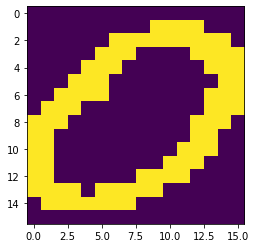

In [85]:
plt.imshow(np.reshape(data[1200,0:256],(16,16)))
plt.show()

In [86]:
predict(Theta1,Theta2,data[1000,0:256])

5

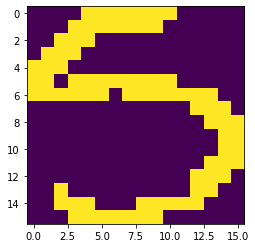

In [87]:
plt.imshow(np.reshape(data[1000,0:256],(16,16)))
plt.show()

Hogy teljesít a tesztadaton?

In [88]:
correct = 0
all_cases = 0
for instance in range(int(len(data)/2),len(data)):    
    if np.argmax(data[instance,256:])==predict(Theta1,Theta2,data[instance,0:256]):
        correct += 1
    all_cases += 1
print ("Accuracy:"+str(correct)+" / "+str(all_cases)+" = "+str(correct/all_cases))

Accuracy:730 / 797 = 0.9159347553324969


És a tanítótadaton?

In [89]:
correct = 0
all_cases = 0
for instance in range(int(len(data)/2)):    
    if np.argmax(data[instance,256:])==predict(Theta1,Theta2,data[instance,0:256]):
        correct += 1
    all_cases += 1
print ("Accuracy:"+str(correct)+" / "+str(all_cases)+" = "+str(correct/all_cases))

Accuracy:796 / 796 = 1.0
